In [1]:
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import utils

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)


# Prepare datasets

In [2]:
opioids = pd.read_csv("dataset/opioids.csv")
overdose = pd.read_csv("dataset/overdoses.csv", thousands = ',')
prescriber = pd.read_csv("dataset/prescriber-info.csv")

In [3]:
opioids.head()

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN


In [4]:
print(len(opioids['Generic Name'].unique()))
opioids['Generic Name'].value_counts()

37


HYDROCODONE/ACETAMINOPHEN         18
OXYCODONE HCL/ACETAMINOPHEN        7
TRAMADOL HCL                       6
METHADONE HCL                      5
HYDROCODONE/IBUPROFEN              5
OXYCODONE HCL                      5
MORPHINE SULFATE                   5
FENTANYL CITRATE                   5
ACETAMINOPHEN WITH CODEINE         4
OXYMORPHONE HCL                    4
HYDROMORPHONE HCL                  4
HYDROMORPHONE HCL/PF               3
FENTANYL                           3
MEPERIDINE HCL                     3
OXYCODONE HCL/ASPIRIN              3
MORPHINE SULFATE/PF                3
CODEINE/BUTALBITAL/ASA/CAFFEIN     3
BUTALBIT/ACETAMIN/CAFF/CODEINE     3
TAPENTADOL HCL                     2
MEPERIDINE HCL/PF                  2
DIHYDROCODEINE/ASPIRIN/CAFFEIN     2
TRAMADOL HCL/ACETAMINOPHEN         2
CODEINE/CARISOPRODOL/ASPIRIN       2
BUPRENORPHINE HCL                  1
BUTORPHANOL TARTRATE               1
LEVORPHANOL TARTRATE               1
OPIUM TINCTURE                     1
I

While a total of 113 uniuque opioid drug brands are listed, there are only 37 distint generic names. The HYDROCODONE/ACETAMINOPHEN is most prevalent, being sold under 18 different names.   

In [5]:
overdose.head(10)

,State,Population,Deaths,Abbrev
0,Alabama,4833722,723,AL
1,Alaska,735132,124,AK
2,Arizona,6626624,1211,AZ
3,Arkansas,2959373,356,AR
4,California,38332521,4521,CA
5,Colorado,5268367,899,CO
6,Connecticut,3596080,623,CT
7,Delaware,925749,189,DE
8,Florida,19552860,2634,FL
9,Georgia,9992167,1206,GA


In [332]:
overdose_copy = overdose.copy()
numeric = ['Population', 'Deaths']
overdose_copy[numeric] = overdose_copy[numeric].apply(pd.to_numeric)
overdose_copy['death_per_cap'] = overdose_copy['Deaths'] / overdose_copy['Population'] 
overdose_copy.sort_values(by='death_per_cap', ascending=False)

,State,Population,Deaths,Abbrev,death_per_cap
Abbrev,,,,,
WV,West Virginia,1854304,627,WV,0.000338
NM,New Mexico,2085287,547,NM,0.000262
NH,New Hampshire,1323459,334,NH,0.000252
KY,Kentucky,4395295,1077,KY,0.000245
OH,Ohio,11570808,2744,OH,0.000237
RI,Rhode Island,1051511,247,RI,0.000235
PA,Pennsylvania,12773801,2732,PA,0.000214
UT,Utah,2900872,603,UT,0.000208
DE,Delaware,925749,189,DE,0.000204


In [7]:
import utils
import plotly
fig = utils.plot_us_map(overdose_copy, 'State', 'Abbrev', 'death_per_cap')
plotly.plotly.iplot( fig )

In [155]:
prescriber.head(10)

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,AMLODIPINE.BESYLATE,AMLODIPINE.BESYLATE.BENAZEPRIL,AMOXICILLIN,AMOX.TR.POTASSIUM.CLAVULANATE,AMPHETAMINE.SALT.COMBO,ATENOLOL,ATORVASTATIN.CALCIUM,AVODART,AZITHROMYCIN,BACLOFEN,BD.ULTRA.FINE.PEN.NEEDLE,BENAZEPRIL.HCL,BENICAR,BENICAR.HCT,BENZTROPINE.MESYLATE,BISOPROLOL.HYDROCHLOROTHIAZIDE,BRIMONIDINE.TARTRATE,BUMETANIDE,BUPROPION.HCL.SR,BUPROPION.XL,BUSPIRONE.HCL,BYSTOLIC,CARBAMAZEPINE,CARBIDOPA.LEVODOPA,CARISOPRODOL,CARTIA.XT,CARVEDILOL,CEFUROXIME,CELEBREX,CEPHALEXIN,CHLORHEXIDINE.GLUCONATE,CHLORTHALIDONE,CILOSTAZOL,CIPROFLOXACIN.HCL,CITALOPRAM.HBR,CLINDAMYCIN.HCL,CLOBETASOL.PROPIONATE,CLONAZEPAM,CLONIDINE.HCL,CLOPIDOGREL,CLOTRIMAZOLE.BETAMETHASONE,COLCRYS,COMBIVENT.RESPIMAT,CRESTOR,CYCLOBENZAPRINE.HCL,DEXILANT,DIAZEPAM,DICLOFENAC.SODIUM,DICYCLOMINE.HCL,DIGOX,DIGOXIN,DILTIAZEM.24HR.CD,DILTIAZEM.24HR.ER,DILTIAZEM.ER,DILTIAZEM.HCL,DIOVAN,DIPHENOXYLATE.ATROPINE,DIVALPROEX.SODIUM,DIVALPROEX.SODIUM.ER,DONEPEZIL.HCL,DORZOLAMIDE.TIMOLOL,DOXAZOSIN.MESYLATE,DOXEPIN.HCL,DOXYCYCLINE.HYCLATE,DULOXETINE.HCL,ENALAPRIL.MALEATE,ESCITALOPRAM.OXALATE,ESTRADIOL,EXELON,FAMOTIDINE,FELODIPINE.ER,FENOFIBRATE,FENTANYL,FINASTERIDE,FLOVENT.HFA,FLUCONAZOLE,FLUOXETINE.HCL,FLUTICASONE.PROPIONATE,FUROSEMIDE,GABAPENTIN,GEMFIBROZIL,GLIMEPIRIDE,GLIPIZIDE,GLIPIZIDE.ER,GLIPIZIDE.XL,GLYBURIDE,HALOPERIDOL,HUMALOG,HYDRALAZINE.HCL,HYDROCHLOROTHIAZIDE,HYDROCODONE.ACETAMINOPHEN,HYDROCORTISONE,HYDROMORPHONE.HCL,HYDROXYZINE.HCL,IBANDRONATE.SODIUM,IBUPROFEN,INSULIN.SYRINGE,IPRATROPIUM.BROMIDE,IRBESARTAN,ISOSORBIDE.MONONITRATE.ER,JANTOVEN,JANUMET,JANUVIA,KETOCONAZOLE,KLOR.CON.10,KLOR.CON.M10,KLOR.CON.M20,LABETALOL.HCL,LACTULOSE,LAMOTRIGINE,LANSOPRAZOLE,LANTUS,LANTUS.SOLOSTAR,LATANOPROST,LEVEMIR,LEVEMIR.FLEXPEN,LEVETIRACETAM,LEVOFLOXACIN,LEVOTHYROXINE.SODIUM,LIDOCAINE,LISINOPRIL,LISINOPRIL.HYDROCHLOROTHIAZIDE,LITHIUM.CARBONATE,LORAZEPAM,LOSARTAN.HYDROCHLOROTHIAZIDE,LOSARTAN.POTASSIUM,LOVASTATIN,LOVAZA,LUMIGAN,LYRICA,MECLIZINE.HCL,MELOXICAM,METFORMIN.HCL,METFORMIN.HCL.ER,METHADONE.HCL,METHOCARBAMOL,METHOTREXATE,METHYLPREDNISOLONE,METOCLOPRAMIDE.HCL,METOLAZONE,METOPROLOL.SUCCINATE,METOPROLOL.TARTRATE,METRONIDAZOLE,MIRTAZAPINE,MONTELUKAST.SODIUM,MORPHINE.SULFATE,MORPHINE.SULFATE.ER,MUPIROCIN,NABUMETONE,NAMENDA,NAMENDA.XR,NAPROXEN,NASONEX,NEXIUM,NIACIN.ER,NIFEDICAL.XL,NIFEDIPINE.ER,NITROFURANTOIN.MONO.MACRO,NITROSTAT,NORTRIPTYLINE.HCL,NOVOLOG,NOVOLOG.FLEXPEN,NYSTATIN,OLANZAPINE,OMEPRAZOLE,ONDANSETRON.HCL,ONDANSETRON.ODT,ONGLYZA,OXCARBAZEPINE,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,OXYCODONE.ACETAMINOPHEN,OXYCODONE.HCL,OXYCONTIN,PANTOPRAZOLE.SODIUM,PAROXETINE.HCL,PHENOBARBITAL,PHENYTOIN.SODIUM.EXTENDED,PIOGLITAZONE.HCL,POLYETHYLENE.GLYCOL.3350,POTASSIUM.CHLORIDE,PRADAXA,PRAMIPEXOLE.DIHYDROCHLORIDE,PRAVASTATIN.SODIUM,PREDNISONE,PREMARIN,PRIMIDONE,PROAIR.HFA,PROMETHAZINE.HCL,PROPRANOLOL.HCL,PROPRANOLOL.HCL.ER,QUETIAPINE.FUMARATE,QUINAPRIL.HCL,RALOXIFENE.HCL,RAMIPRIL,RANEXA,RANITIDINE.HCL,RESTASIS,RISPERIDONE,ROPINIROLE.HCL,SEROQUEL.XR,SERTRALINE.HCL,SIMVASTATIN,SOTALOL,SPIRIVA,SPIRONOLACTONE,SUCRALFATE,SULFAMETHOXAZOLE.TRIMETHOPRIM,SUMATRIPTAN.SUCCINATE,SYMBICORT,SYNTHROID,TAMSULOSIN.HCL,TEMAZEPAM,TERAZOSIN.HCL,TIMOLOL.MALEATE,TIZANIDINE.HCL,TOLTERODINE.TARTRATE.ER,TOPIRAMATE,TOPROL.XL,TORSEMIDE,TRAMADOL.HCL,TRAVATAN.Z,TRAZODONE.HCL,TRIAMCINOLONE.ACETONIDE,TRIAMTERENE.HYDROCHLOROTHIAZID,VALACYCLOVIR,VALSARTAN,VALSARTAN.HYDROCHLOROTHIAZIDE,VENLAFAXINE.HCL,VENLAFAXINE.HCL.ER,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0

In [169]:
credentials = prescriber['Credentials']
credentials_clean = utils.clean_credentials(credentials)        
credentials_vars = utils.create_credential_variables(credentials_clean)
credentials_expand = pd.concat([credentials, credentials_vars], axis = 1)
credentials_expand.head(10)

,Credentials,DO,DPM,Dental,MD,NP,OD,PA
0,DDS,0,0,1,0,0,0,0
1,MD,0,0,0,1,0,0,0
2,M.D.,0,0,0,1,0,0,0
3,MD,0,0,0,1,0,0,0
4,M.D.,0,0,0,1,0,0,0
5,DO,1,0,0,0,0,0,0
6,MD,0,0,0,1,0,0,0
7,"RN, MSN, ANP-BC",0,0,0,0,1,0,0
8,O.D.,0,0,0,0,0,1,0
9,MD,0,0,0,1,0,0,0


In [149]:
drugs = prescriber.ix[:, 5:-1]
drugs.describe()

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,AMLODIPINE.BESYLATE,AMLODIPINE.BESYLATE.BENAZEPRIL,AMOXICILLIN,AMOX.TR.POTASSIUM.CLAVULANATE,AMPHETAMINE.SALT.COMBO,ATENOLOL,ATORVASTATIN.CALCIUM,AVODART,AZITHROMYCIN,BACLOFEN,BD.ULTRA.FINE.PEN.NEEDLE,BENAZEPRIL.HCL,BENICAR,BENICAR.HCT,BENZTROPINE.MESYLATE,BISOPROLOL.HYDROCHLOROTHIAZIDE,BRIMONIDINE.TARTRATE,BUMETANIDE,BUPROPION.HCL.SR,BUPROPION.XL,BUSPIRONE.HCL,BYSTOLIC,CARBAMAZEPINE,CARBIDOPA.LEVODOPA,CARISOPRODOL,CARTIA.XT,CARVEDILOL,CEFUROXIME,CELEBREX,CEPHALEXIN,CHLORHEXIDINE.GLUCONATE,CHLORTHALIDONE,CILOSTAZOL,CIPROFLOXACIN.HCL,CITALOPRAM.HBR,CLINDAMYCIN.HCL,CLOBETASOL.PROPIONATE,CLONAZEPAM,CLONIDINE.HCL,CLOPIDOGREL,CLOTRIMAZOLE.BETAMETHASONE,COLCRYS,COMBIVENT.RESPIMAT,CRESTOR,CYCLOBENZAPRINE.HCL,DEXILANT,DIAZEPAM,DICLOFENAC.SODIUM,DICYCLOMINE.HCL,DIGOX,DIGOXIN,DILTIAZEM.24HR.CD,DILTIAZEM.24HR.ER,DILTIAZEM.ER,DILTIAZEM.HCL,DIOVAN,DIPHENOXYLATE.ATROPINE,DIVALPROEX.SODIUM,DIVALPROEX.SODIUM.ER,DONEPEZIL.HCL,DORZOLAMIDE.TIMOLOL,DOXAZOSIN.MESYLATE,DOXEPIN.HCL,DOXYCYCLINE.HYCLATE,DULOXETINE.HCL,ENALAPRIL.MALEATE,ESCITALOPRAM.OXALATE,ESTRADIOL,EXELON,FAMOTIDINE,FELODIPINE.ER,FENOFIBRATE,FENTANYL,FINASTERIDE,FLOVENT.HFA,FLUCONAZOLE,FLUOXETINE.HCL,FLUTICASONE.PROPIONATE,FUROSEMIDE,GABAPENTIN,GEMFIBROZIL,GLIMEPIRIDE,GLIPIZIDE,GLIPIZIDE.ER,GLIPIZIDE.XL,GLYBURIDE,HALOPERIDOL,HUMALOG,HYDRALAZINE.HCL,HYDROCHLOROTHIAZIDE,HYDROCODONE.ACETAMINOPHEN,HYDROCORTISONE,HYDROMORPHONE.HCL,HYDROXYZINE.HCL,IBANDRONATE.SODIUM,IBUPROFEN,INSULIN.SYRINGE,IPRATROPIUM.BROMIDE,IRBESARTAN,ISOSORBIDE.MONONITRATE.ER,JANTOVEN,JANUMET,JANUVIA,KETOCONAZOLE,KLOR.CON.10,KLOR.CON.M10,KLOR.CON.M20,LABETALOL.HCL,LACTULOSE,LAMOTRIGINE,LANSOPRAZOLE,LANTUS,LANTUS.SOLOSTAR,LATANOPROST,LEVEMIR,LEVEMIR.FLEXPEN,LEVETIRACETAM,LEVOFLOXACIN,LEVOTHYROXINE.SODIUM,LIDOCAINE,LISINOPRIL,LISINOPRIL.HYDROCHLOROTHIAZIDE,LITHIUM.CARBONATE,LORAZEPAM,LOSARTAN.HYDROCHLOROTHIAZIDE,LOSARTAN.POTASSIUM,LOVASTATIN,LOVAZA,LUMIGAN,LYRICA,MECLIZINE.HCL,MELOXICAM,METFORMIN.HCL,METFORMIN.HCL.ER,METHADONE.HCL,METHOCARBAMOL,METHOTREXATE,METHYLPREDNISOLONE,METOCLOPRAMIDE.HCL,METOLAZONE,METOPROLOL.SUCCINATE,METOPROLOL.TARTRATE,METRONIDAZOLE,MIRTAZAPINE,MONTELUKAST.SODIUM,MORPHINE.SULFATE,MORPHINE.SULFATE.ER,MUPIROCIN,NABUMETONE,NAMENDA,NAMENDA.XR,NAPROXEN,NASONEX,NEXIUM,NIACIN.ER,NIFEDICAL.XL,NIFEDIPINE.ER,NITROFURANTOIN.MONO.MACRO,NITROSTAT,NORTRIPTYLINE.HCL,NOVOLOG,NOVOLOG.FLEXPEN,NYSTATIN,OLANZAPINE,OMEPRAZOLE,ONDANSETRON.HCL,ONDANSETRON.ODT,ONGLYZA,OXCARBAZEPINE,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,OXYCODONE.ACETAMINOPHEN,OXYCODONE.HCL,OXYCONTIN,PANTOPRAZOLE.SODIUM,PAROXETINE.HCL,PHENOBARBITAL,PHENYTOIN.SODIUM.EXTENDED,PIOGLITAZONE.HCL,POLYETHYLENE.GLYCOL.3350,POTASSIUM.CHLORIDE,PRADAXA,PRAMIPEXOLE.DIHYDROCHLORIDE,PRAVASTATIN.SODIUM,PREDNISONE,PREMARIN,PRIMIDONE,PROAIR.HFA,PROMETHAZINE.HCL,PROPRANOLOL.HCL,PROPRANOLOL.HCL.ER,QUETIAPINE.FUMARATE,QUINAPRIL.HCL,RALOXIFENE.HCL,RAMIPRIL,RANEXA,RANITIDINE.HCL,RESTASIS,RISPERIDONE,ROPINIROLE.HCL,SEROQUEL.XR,SERTRALINE.HCL,SIMVASTATIN,SOTALOL,SPIRIVA,SPIRONOLACTONE,SUCRALFATE,SULFAMETHOXAZOLE.TRIMETHOPRIM,SUMATRIPTAN.SUCCINATE,SYMBICORT,SYNTHROID,TAMSULOSIN.HCL,TEMAZEPAM,TERAZOSIN.HCL,TIMOLOL.MALEATE,TIZANIDINE.HCL,TOLTERODINE.TARTRATE.ER,TOPIRAMATE,TOPROL.XL,TORSEMIDE,TRAMADOL.HCL,TRAVATAN.Z,TRAZODONE.HCL,TRIAMCINOLONE.ACETONIDE,TRIAMTERENE.HYDROCHLOROTHIAZID,VALACYCLOVIR,VALSARTAN,VALSARTAN.HYDROCHLOROTHIAZIDE,VENLAFAXINE.HCL,VENLAFAXINE.HCL.ER,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
count,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.0

In [157]:
op_names = opioids['Generic Name'].unique()
drug_names = list(drugs.columns)
op_names = [n.replace("/", ".") for n in op_names]
op_names = [n.replace(" ", ".") for n in op_names]

In [158]:
is_op = []
for d in drug_names:
    is_op.append(int(d in op_names))
opioids_columns = [drug_names[i] for i, n in enumerate(is_op) if n==1] 
opioids_columns

['FENTANYL',
 'HYDROCODONE.ACETAMINOPHEN',
 'HYDROMORPHONE.HCL',
 'METHADONE.HCL',
 'MORPHINE.SULFATE',
 'OXYCODONE.HCL',
 'TRAMADOL.HCL']

In [159]:
opioids_columns.extend(['ACETAMINOPHEN.CODEINE', 'OXYCODONE.ACETAMINOPHEN'])
opioids_columns

['FENTANYL',
 'HYDROCODONE.ACETAMINOPHEN',
 'HYDROMORPHONE.HCL',
 'METHADONE.HCL',
 'MORPHINE.SULFATE',
 'OXYCODONE.HCL',
 'TRAMADOL.HCL',
 'ACETAMINOPHEN.CODEINE',
 'OXYCODONE.ACETAMINOPHEN']

In [170]:
non_op = np.setdiff1d(drug_names, opioids_columns)
features = pd.concat([prescriber.ix[:, [1, 2, 4]], 
                      prescriber[non_op], 
                      credentials_vars], axis=1)
features = pd.concat([features, ])
#features = pd.get_dummies(features)
#print("{} total features after one-hot encoding.".format(len(list(features.columns))))
# print(list(features.columns))

In [172]:
labels = pd.concat([prescriber['Opioid.Prescriber'], prescriber[opioids_columns]], axis=1)
labels.head(10)

,Opioid.Prescriber,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,OXYCODONE.HCL,TRAMADOL.HCL,ACETAMINOPHEN.CODEINE,OXYCODONE.ACETAMINOPHEN
0,1,0,17,0,0,0,0,0,0,0
1,1,0,182,0,0,0,87,36,0,33
2,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,22,29,90,43,229
4,1,22,22,0,0,0,22,0,0,0
5,1,0,0,0,0,0,0,0,0,25
6,1,0,24,0,0,0,21,15,0,30
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,1,25,0,0,0,0,11,28,0,0


### Create a test dataset

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.15, random_state=42)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

import pickle 
with open("dataset/datasets.pickle", "wb") as f:
    pickle.dump(X_train, f)
    pickle.dump(X_test, f)
    pickle.dump(y_train, f)
    pickle.dump(y_test, f)
    f.close()

Training set has 21250 samples.
Testing set has 3750 samples.


### Data exploration

In [319]:
X = X_train.copy()
X['non_opioid_total'] = X.ix[:, 3:-7].sum(axis=1)

In [320]:
y = y_train.copy()
y['opioid_total'] = y.ix[:, 1:].sum(axis = 1)
y.head(10)

,Opioid.Prescriber,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,OXYCODONE.HCL,TRAMADOL.HCL,ACETAMINOPHEN.CODEINE,OXYCODONE.ACETAMINOPHEN,opioid_total
1704,1,11,32,0,0,0,0,13,21,0,77
1662,1,0,0,0,0,0,0,0,0,0,0
18926,1,0,14,0,0,0,0,0,0,0,14
23351,1,0,0,0,0,0,0,28,0,0,28
17097,0,0,0,0,0,0,0,0,0,0,0
19542,1,0,66,0,0,0,0,26,0,0,92
8054,1,29,62,0,0,0,32,79,16,0,218
11444,0,0,0,0,0,0,0,0,0,0,0
10952,0,0,0,0,0,0,0,0,0,0,0
18656,1,0,260,12,0,0,0,0,0,13,285


In [333]:
tmp = pd.concat([X, y], axis=1)
state_total_opioid = tmp['opioid_total'].groupby(tmp['State']).sum()
overdose_copy_ = overdose_copy.join(state_total_opioid)
overdose_copy_['opioid_per_cap'] = overdose_copy_['opioid_total'] / overdose_copy_['Population']
overdose_copy_.sort_values(by='opioid_per_cap', ascending=False)


,State,Population,Deaths,Abbrev,death_per_cap,opioid_total,opioid_per_cap
Abbrev,,,,,,,
AL,Alabama,4833722,723,AL,0.000150,54003,0.011172
LA,Louisiana,4625470,777,LA,0.000168,49192,0.010635
WV,West Virginia,1854304,627,WV,0.000338,17198,0.009275
IN,Indiana,6570902,1172,IN,0.000178,60597,0.009222
MS,Mississippi,2991207,336,MS,0.000112,26889,0.008989
AR,Arkansas,2959373,356,AR,0.000120,26531,0.008965
TN,Tennessee,6495978,1269,TN,0.000195,56186,0.008649
KY,Kentucky,4395295,1077,KY,0.000245,35261,0.008022
NC,North Carolina,9848060,1358,NC,0.000138,74139,0.007528


(0, 0.0125)

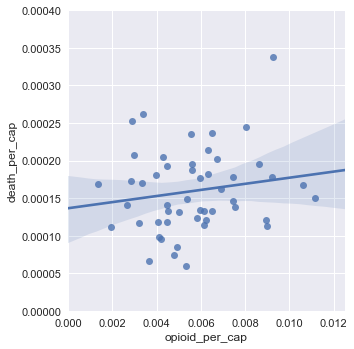

In [351]:
scatter = sns.lmplot(x = 'opioid_per_cap', y = 'death_per_cap', 
                data = overdose_copy_
               )
plt.ylim(0, .0004)
plt.xlim(0, .0125)

Surprisingly, death_per_cap and opioid_per_cap not not as strongly related as I expected. Some states with high overdose death rates are not necessarily the states giving out the opioids the most.  

In [406]:
pd.options.display.float_format = '{:,.6f}'.format
overdose_copy_[overdose_copy_['opioid_per_cap'] > .008][overdose_copy_['death_per_cap'] < .000175]

,State,Population,Deaths,Abbrev,death_per_cap,opioid_total,opioid_per_cap
Abbrev,,,,,,,
AL,Alabama,4833722,723,AL,0.000150,54003,0.011172
AR,Arkansas,2959373,356,AR,0.000120,26531,0.008965
LA,Louisiana,4625470,777,LA,0.000168,49192,0.010635
MS,Mississippi,2991207,336,MS,0.000112,26889,0.008989


In [407]:
overdose_copy_[overdose_copy_['opioid_per_cap'] < .005][overdose_copy_['death_per_cap'] > .000175]

,State,Population,Deaths,Abbrev,death_per_cap,opioid_total,opioid_per_cap
Abbrev,,,,,,,
DE,Delaware,925749,189,DE,0.000204,3988,0.004308
MD,Maryland,5928814,1070,MD,0.000180,23594,0.003980
MA,Massachusetts,6692824,1289,MA,0.000193,29872,0.004463
NH,New Hampshire,1323459,334,NH,0.000252,3805,0.002875
NM,New Mexico,2085287,547,NM,0.000262,7092,0.003401
UT,Utah,2900872,603,UT,0.000208,8685,0.002994


What makes these two groups different? 

#### Male vs Female

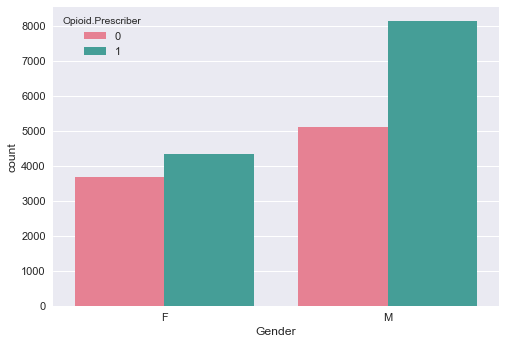

In [242]:
tmp = pd.concat([X, y], axis=1)
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("darkgrid")

sns.countplot(x="Gender", hue="Opioid.Prescriber", data=tmp, palette=sns.husl_palette(2))
plt.show()

Among prefessionals with NPI, females are more likely to prescribe opioids

The average opioid prescription of female opioid prescriber: 120.38
The average opioid prescription of male opioid prescriber: 178.35


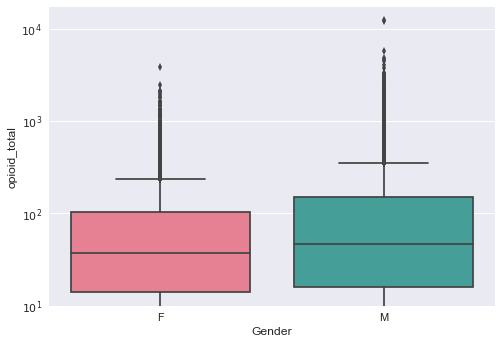

In [264]:
female = tmp[tmp['Gender'] == 'F'][tmp['opioid_total'] > 0]
female_total = female['opioid_total'].sum(axis=0)
male = tmp[tmp['Gender']=='M'][tmp['opioid_total'] > 0]
male_total = male['opioid_total'].sum(axis=0)

print('The average opioid prescription of female opioid prescriber: {:.2f}'.format(female_total / female.shape[0]))
print('The average opioid prescription of male opioid prescriber: {:.2f}'.format(male_total / male.shape[0]))

pos_prescribers = tmp[tmp['Opioid.Prescriber'] == 1]
ax = sns.boxplot(x = 'Gender', y = 'opioid_total', data = pos_prescribers, palette=sns.husl_palette(2))
ax.set_yscale("log", nonposy='clip')
#ax.set_ylim(ymin=0.)
plt.show()

Among opioid prescribers, males tend to prescribe larger quantity. Note the y axis is log-scaled. The majority of prescribers prescribe mostly moderate amounts, some outliers tend to go overfew hundreds prescription during the given period. Not few male prescribers prescribed over 10,000 opioids. 

In [249]:
toomany = tmp[tmp['opioid_total'] > 10000]
toomany

,Gender,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,AMLODIPINE.BESYLATE,AMLODIPINE.BESYLATE.BENAZEPRIL,AMOX.TR.POTASSIUM.CLAVULANATE,AMOXICILLIN,AMPHETAMINE.SALT.COMBO,ATENOLOL,ATORVASTATIN.CALCIUM,AVODART,AZITHROMYCIN,BACLOFEN,BD.ULTRA.FINE.PEN.NEEDLE,BENAZEPRIL.HCL,BENICAR,BENICAR.HCT,BENZTROPINE.MESYLATE,BISOPROLOL.HYDROCHLOROTHIAZIDE,BRIMONIDINE.TARTRATE,BUMETANIDE,BUPROPION.HCL.SR,BUPROPION.XL,BUSPIRONE.HCL,BYSTOLIC,CARBAMAZEPINE,CARBIDOPA.LEVODOPA,CARISOPRODOL,CARTIA.XT,CARVEDILOL,CEFUROXIME,CELEBREX,CEPHALEXIN,CHLORHEXIDINE.GLUCONATE,CHLORTHALIDONE,CILOSTAZOL,CIPROFLOXACIN.HCL,CITALOPRAM.HBR,CLINDAMYCIN.HCL,CLOBETASOL.PROPIONATE,CLONAZEPAM,CLONIDINE.HCL,CLOPIDOGREL,CLOTRIMAZOLE.BETAMETHASONE,COLCRYS,COMBIVENT.RESPIMAT,CRESTOR,CYCLOBENZAPRINE.HCL,DEXILANT,DIAZEPAM,DICLOFENAC.SODIUM,DICYCLOMINE.HCL,DIGOX,DIGOXIN,DILTIAZEM.24HR.CD,DILTIAZEM.24HR.ER,DILTIAZEM.ER,DILTIAZEM.HCL,DIOVAN,DIPHENOXYLATE.ATROPINE,DIVALPROEX.SODIUM,DIVALPROEX.SODIUM.ER,DONEPEZIL.HCL,DORZOLAMIDE.TIMOLOL,DOXAZOSIN.MESYLATE,DOXEPIN.HCL,DOXYCYCLINE.HYCLATE,DULOXETINE.HCL,ENALAPRIL.MALEATE,ESCITALOPRAM.OXALATE,ESTRADIOL,EXELON,FAMOTIDINE,FELODIPINE.ER,FENOFIBRATE,FINASTERIDE,FLOVENT.HFA,FLUCONAZOLE,FLUOXETINE.HCL,FLUTICASONE.PROPIONATE,FUROSEMIDE,GABAPENTIN,GEMFIBROZIL,GLIMEPIRIDE,GLIPIZIDE,GLIPIZIDE.ER,GLIPIZIDE.XL,GLYBURIDE,HALOPERIDOL,HUMALOG,HYDRALAZINE.HCL,HYDROCHLOROTHIAZIDE,HYDROCORTISONE,HYDROXYZINE.HCL,IBANDRONATE.SODIUM,IBUPROFEN,INSULIN.SYRINGE,IPRATROPIUM.BROMIDE,IRBESARTAN,ISOSORBIDE.MONONITRATE.ER,JANTOVEN,JANUMET,JANUVIA,KETOCONAZOLE,KLOR.CON.10,KLOR.CON.M10,KLOR.CON.M20,LABETALOL.HCL,LACTULOSE,LAMOTRIGINE,LANSOPRAZOLE,LANTUS,LANTUS.SOLOSTAR,LATANOPROST,LEVEMIR,LEVEMIR.FLEXPEN,LEVETIRACETAM,LEVOFLOXACIN,LEVOTHYROXINE.SODIUM,LIDOCAINE,LISINOPRIL,LISINOPRIL.HYDROCHLOROTHIAZIDE,LITHIUM.CARBONATE,LORAZEPAM,LOSARTAN.HYDROCHLOROTHIAZIDE,LOSARTAN.POTASSIUM,LOVASTATIN,LOVAZA,LUMIGAN,LYRICA,MECLIZINE.HCL,MELOXICAM,METFORMIN.HCL,METFORMIN.HCL.ER,METHOCARBAMOL,METHOTREXATE,METHYLPREDNISOLONE,METOCLOPRAMIDE.HCL,METOLAZONE,METOPROLOL.SUCCINATE,METOPROLOL.TARTRATE,METRONIDAZOLE,MIRTAZAPINE,MONTELUKAST.SODIUM,MORPHINE.SULFATE.ER,MUPIROCIN,NABUMETONE,NAMENDA,NAMENDA.XR,NAPROXEN,NASONEX,NEXIUM,NIACIN.ER,NIFEDICAL.XL,NIFEDIPINE.ER,NITROFURANTOIN.MONO.MACRO,NITROSTAT,NORTRIPTYLINE.HCL,NOVOLOG,NOVOLOG.FLEXPEN,NYSTATIN,OLANZAPINE,OMEPRAZOLE,ONDANSETRON.HCL,ONDANSETRON.ODT,ONGLYZA,OXCARBAZEPINE,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,OXYCONTIN,PANTOPRAZOLE.SODIUM,PAROXETINE.HCL,PHENOBARBITAL,PHENYTOIN.SODIUM.EXTENDED,PIOGLITAZONE.HCL,POLYETHYLENE.GLYCOL.3350,POTASSIUM.CHLORIDE,PRADAXA,PRAMIPEXOLE.DIHYDROCHLORIDE,PRAVASTATIN.SODIUM,PREDNISONE,PREMARIN,PRIMIDONE,PROAIR.HFA,PROMETHAZINE.HCL,PROPRANOLOL.HCL,PROPRANOLOL.HCL.ER,QUETIAPINE.FUMARATE,QUINAPRIL.HCL,RALOXIFENE.HCL,RAMIPRIL,RANEXA,RANITIDINE.HCL,RESTASIS,RISPERIDONE,ROPINIROLE.HCL,SEROQUEL.XR,SERTRALINE.HCL,SIMVASTATIN,SOTALOL,SPIRIVA,SPIRONOLACTONE,SUCRALFATE,SULFAMETHOXAZOLE.TRIMETHOPRIM,SUMATRIPTAN.SUCCINATE,SYMBICORT,SYNTHROID,TAMSULOSIN.HCL,TEMAZEPAM,TERAZOSIN.HCL,TIMOLOL.MALEATE,TIZANIDINE.HCL,TOLTERODINE.TARTRATE.ER,TOPIRAMATE,TOPROL.XL,TORSEMIDE,TRAVATAN.Z,TRAZODONE.HCL,TRIAMCINOLONE.ACETONIDE,TRIAMTERENE.HYDROCHLOROTHIAZID,VALACYCLOVIR,VALSARTAN,VALSARTAN.HYDROCHLOROTHIAZIDE,VENLAFAXINE.HCL,VENLAFAXINE.HCL.ER,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,DO,DPM,Dental,MD,NP,OD,PA,non_opioid_total,Opioid.Prescriber,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,OXYCODONE.HCL,TRAMADOL.HCL,ACETAMINOPHEN.CODEINE,OXYCODONE.ACETAMINOPHEN,opioid_total
14265,M,FL,Interventional Pain Management,0,0,0,0,0,0,300,0,99,0,0,0,0,0,0,0,0,0,353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,955,0,0,0,36,32,0,0,0,0,0,0,0,131,0,0,0,0,0,0,501,0,184,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,193,0,0,0,0,0,0,0,0,0,0,0,0,12,1805,0,0,0,0,0,0,0,0,0,0,0,0

In [252]:
toomany['opioid_total'] / toomany['non_opioid_total']

14265    1.313746
9936     0.804516
dtype: float64

Two male MDs in pain medicine and rehab, respectively, prescribed that many opioids. Let's investigate the ratio of opioids to non-opioids of these docs are in normal range.   

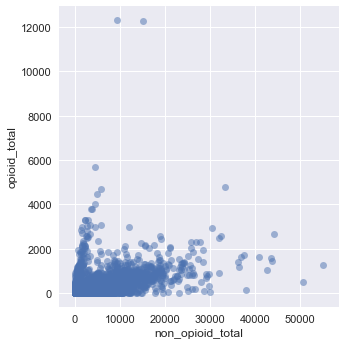

In [398]:
tmp['high_ratio'] = tmp['opioid_total'] / tmp['non_opioid_total'] > 1
ax = sns.lmplot(x = 'non_opioid_total', y = 'opioid_total', 
                data = tmp, fit_reg=False,
               # hue = 'high_ratio',
                palette=sns.husl_palette(2),
                scatter_kws={'alpha':0.5}
               )

We can easily recognize two outlier data points with more than 12,000 opioids prescriptions. Note that the most of prefessionals in the dataset prescribe less than 20,000 non-opioids drugs and less than 2,000 opioids drugs. While the ratio of opioids prescription to non-opioids prescription varies, we can kind of track the subsegment group with high opioids prescription rate.

In [399]:
high_ratio = tmp[tmp['high_ratio'] > .25]
high_ratio_specialty = high_ratio['Specialty'].value_counts()
high_ratio_specialty

Emergency Medicine                                                377
Physician Assistant                                               367
Orthopedic Surgery                                                346
General Surgery                                                   256
Nurse Practitioner                                                165
Dentist                                                           164
Student in an Organized Health Care Education/Training Program     80
Physical Medicine and Rehabilitation                               58
Internal Medicine                                                  44
Family Practice                                                    42
Anesthesiology                                                     42
Podiatry                                                           40
Neurosurgery                                                       39
Oral Surgery (dentists only)                                       36
Hand Surgery        

Many sub-specialty groups that involve surgery are listed high in the above list. That pain management, anesthesiology, and emergency medicine are listed high is as expected. A bit surprising is that physicians assistant in the high ratio group  are prescribing opioids as many as emergency medicine, and nurse practitioners are prescribing opioids as much as dentists. It would have been more helpful if the dataset specifically which specialty department these PAs and NPs work for. 

In [400]:
#high_ratio['State'].value_counts()
top10 = high_ratio_specialty.index[:10]
low_od = ['MO', 'AR', 'AL']
high_od = ['NH', 'UT', 'NM']
state_interest = low_od + high_od
tmp_cross = pd.crosstab(tmp['State'], tmp['Specialty'])
tmp_cross_top10 = tmp_cross.loc[:, top10]
tmp_cross_top10_small = tmp_cross_top10.ix[state_interest, :]
tmp_cross_top10_small

,Emergency Medicine,Physician Assistant,Orthopedic Surgery,General Surgery,Nurse Practitioner,Dentist,Student in an Organized Health Care Education/Training Program,Physical Medicine and Rehabilitation,Internal Medicine,Family Practice
State,,,,,,,,,,
MO,21,12,8,7,46,58,10,5,46,44
AR,5,7,2,4,19,26,6,2,17,37
AL,12,5,9,10,39,27,12,4,36,42
NH,1,9,6,0,19,9,4,1,13,7
UT,11,22,8,5,10,14,3,0,11,12
NM,8,6,2,0,15,12,8,0,11,25


In [402]:
tmp_cross_top10_small['sum'] = tmp_cross_top10_small.sum(axis=1)
for i, c in enumerate(tmp_cross_top10_small.columns):
    tmp_cross_top10_small.ix[:, i] = tmp_cross_top10_small.ix[:, i] / tmp_cross_top10_small['sum']

pd.options.display.float_format = '{:,.4f}'.format
tmp_cross_top10_small.drop('sum', 1)   

,Emergency Medicine,Physician Assistant,Orthopedic Surgery,General Surgery,Nurse Practitioner,Dentist,Student in an Organized Health Care Education/Training Program,Physical Medicine and Rehabilitation,Internal Medicine,Family Practice
State,,,,,,,,,,
MO,0.0817,0.0467,0.0311,0.0272,0.1790,0.2257,0.0389,0.0195,0.1790,0.1712
AR,0.0400,0.0560,0.0160,0.0320,0.1520,0.2080,0.0480,0.0160,0.1360,0.2960
AL,0.0612,0.0255,0.0459,0.0510,0.1990,0.1378,0.0612,0.0204,0.1837,0.2143
NH,0.0145,0.1304,0.0870,0.0000,0.2754,0.1304,0.0580,0.0145,0.1884,0.1014
UT,0.1146,0.2292,0.0833,0.0521,0.1042,0.1458,0.0312,0.0000,0.1146,0.1250
NM,0.0920,0.0690,0.0230,0.0000,0.1724,0.1379,0.0920,0.0000,0.1264,0.2874


In [219]:
small = tmp[['State', 'Opioid.Prescriber']]
cross = pd.crosstab(small['State'], small['Opioid.Prescriber'])

In [167]:
cross['ratio'] =  cross.ix[:, 1] / (cross.ix[:, 0] + cross.ix[:, 1])
cross.sort_values(by = 'ratio', ascending=False)
overdose_copy = overdose_copy.set_index(overdose['Abbrev'])
overdose_copy.index.names = ['State']
cross_ = cross.join(overdose_copy[['Deaths', 'death_per_cap']])
cross_['death_per_cap'] = cross_['death_per_cap'] * 1000
cross_['Deaths_per_prescriber'] = cross_['Deaths'] / cross_.ix[:, 1]
#cross_.sort_values(by = 'death_per_cap', ascending=False)

,0,1,ratio,Deaths,death_per_cap,Deaths_per_prescriber
State,,,,,,
WV,63,107,0.629412,627.0,0.338132,5.859813
NM,57,77,0.574627,547.0,0.262314,7.103896
NH,41,59,0.590000,334.0,0.252369,5.661017
KY,149,169,0.531447,1077.0,0.245035,6.372781
OH,356,476,0.572115,2744.0,0.237149,5.764706
RI,33,59,0.641304,247.0,0.234900,4.186441
PA,465,576,0.553314,2732.0,0.213875,4.743056
UT,46,91,0.664234,603.0,0.207869,6.626374
DE,36,44,0.550000,189.0,0.204159,4.295455
